### Introduction to multiclass classification techniques in Logistic Regression Model 
- New **Pre-Processing Feature Selection**: - `One - Hot encoding`
- Different Multi-class strategies: - `One-vs-All` and `One-vs-One`
- Different Model Evaluation Metric technique 

In [13]:
#Importing Libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [14]:
#Data Collection
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/GkDzb7bWrtvGXdPOfk6CIg/Obesity-level-prediction-dataset.csv"

df = pd.read_csv(url)
df.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


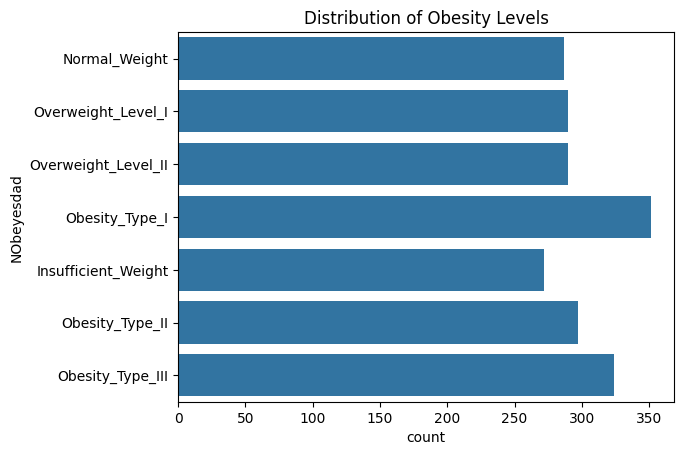

In [15]:
#Check the statistical distribution of continuous(int,floating) independent variables(explainatory variables)
#On dependent variables 
sns.countplot(y= 'NObeyesdad', data= df)
plt.title('Distribution of Obesity Levels')
plt.show()

In [16]:
#Description of dataset, checking for null value count, info and description of dataset
# Check of each column in dataset and count no. of null values  
print(df.isnull().sum())

#Information & description of dataset 
print(df.info())
print(df.describe())

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height             

### After Analysis of Dataset: - 
- No, not null values are there for continuous function 
- Continuous function are float64, int64 values and Non - Continuous functions are objects 

### Feature Selection of Dataset
1. Using Standard feature selection method on continuous variables 
2. Why to do standard feature selection 
    - As we need to classify the datapoint into different class categories, we need to have a comparable set of independent variables 
3. First, selected dataframes are standarized and then contatinated again in the main data sets 

In [ ]:
#Feature Selection on continuous columns 
from sklearn.preprocessing import StandardScaler

continuous_df = df.select_dtypes(include= 'float64').columns.to_list()

#Standarizing continuous variables 
standard = StandardScaler()
standard_dataframe = standard.fit_transform(df[continuous_df])

#After Standarizing, we need to add this in our original df
#First, convert this into dataframes with correct column name and values(standarized)
stand_df = pd.DataFrame(standard_dataframe, columns= standard.get_feature_names_out(continuous_df)) 

#Add, it to original dataframe (Changes needed in column name wise (axis = 1))
sdf = pd.concat([df.drop(columns= continuous_df), stand_df], axis= 1)
print(sdf)

      Gender family_history_with_overweight FAVC       CAEC SMOKE  SCC  \
0     Female                            yes   no  Sometimes    no   no   
1     Female                            yes   no  Sometimes   yes  yes   
2       Male                            yes   no  Sometimes    no   no   
3       Male                             no   no  Sometimes    no   no   
4       Male                             no   no  Sometimes    no   no   
...      ...                            ...  ...        ...   ...  ...   
2106  Female                            yes  yes  Sometimes    no   no   
2107  Female                            yes  yes  Sometimes    no   no   
2108  Female                            yes  yes  Sometimes    no   no   
2109  Female                            yes  yes  Sometimes    no   no   
2110  Female                            yes  yes  Sometimes    no   no   

            CALC                 MTRANS           NObeyesdad       Age  \
0             no  Public_Transportati

### Pre-processing feature selection using One - Hot encoding 
- One-Hot Encoding to be applied only on `categorical data`. 
- Categorical data --> One-Hot encoder --> Binary Column of features (1: Present) & (0: Absent)
---
```python 
encoder = OneHotEncoder(sparse_output=False, drop='first')
```
- Creates a dense array (not sparse).
- Encodes categorical variables into 0/1 columns.
- Drops the first category to avoid redundancy.

In [68]:
#One-Hot encoder 
from sklearn.preprocessing import OneHotEncoder

categorical = sdf.select_dtypes(include= ['object']).columns.to_list()
#Remove dependent variable as we don't want to apply One-Hot encoder on target variable
categorical.remove('NObeyesdad')

encoder = OneHotEncoder(sparse_output=False, drop= 'first')
encoded = encoder.fit_transform(sdf[categorical])

#Covert, encoded data back to dataframe 
encoded_df = pd.DataFrame(encoded, columns= encoder.get_feature_names_out(categorical))

#Add, one-hot encoded variables in dataset 
esdf = pd.concat([sdf.drop(columns= categorical), encoded_df], axis= 1)
print(esdf)

               NObeyesdad       Age    Height    Weight      FCVC       NCP  \
0           Normal_Weight -0.522124 -0.875589 -0.862558 -0.785019  0.404153   
1           Normal_Weight -0.522124 -1.947599 -1.168077  1.088342  0.404153   
2           Normal_Weight -0.206889  1.054029 -0.366090 -0.785019  0.404153   
3      Overweight_Level_I  0.423582  1.054029  0.015808  1.088342  0.404153   
4     Overweight_Level_II -0.364507  0.839627  0.122740 -0.785019 -2.167023   
...                   ...       ...       ...       ...       ...       ...   
2106     Obesity_Type_III -0.525774  0.097045  1.711763  1.088342  0.404153   
2107     Obesity_Type_III -0.367195  0.502844  1.800914  1.088342  0.404153   
2108     Obesity_Type_III -0.281909  0.541672  1.798868  1.088342  0.404153   
2109     Obesity_Type_III  0.007776  0.404927  1.785780  1.088342  0.404153   
2110     Obesity_Type_III -0.102119  0.398344  1.790592  1.088342  0.404153   

          CH2O       FAF       TUE  Gender_Male  ..

### Dependent variable
- In this variable use label encoding to categorizing column's from (0 - 9) {9 is hightest}

In [70]:
#Label encoding in target variable based on category
esdf['NObeyesdad'] = esdf['NObeyesdad'].astype('category').cat.codes
esdf.head()

,NObeyesdad,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,1,-0.522124,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1,-0.522124,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1,-0.206889,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,5,0.423582,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,6,-0.364507,0.839627,0.122740,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


### Model Selection 
- Preparing the dataset's into independent variable & dependent variable 
- Define datasets into train, & test datasets 

In [77]:
#Target variable 
Y = esdf['NObeyesdad']

#Independent variable(Explainatory variables)
X = esdf.drop('NObeyesdad', axis= 1)


In [78]:
#Model Selection 
from sklearn.model_selection import train_test_split

#stratify=y ensures the distribution of target classes is the same in both training and testing sets.
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size= 0.2, random_state= 42, stratify=y)

### Multi-classification techniques 
<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-7zrl{text-align:left;vertical-align:bottom}
</style>
<table class="tg"><thead>
  <tr>
    <th class="tg-7zrl">Key Differences</th>
    <th class="tg-7zrl">One-vs-All</th>
    <th class="tg-7zrl">One-vs-One</th>
  </tr></thead>
<tbody>
  <tr>
    <td class="tg-7zrl">Classifier</td>
    <td class="tg-7zrl">K</td>
    <td class="tg-7zrl">K * (k - 1) / 2</td>
  </tr>
  <tr>
    <td class="tg-7zrl">Training Time</td>
    <td class="tg-7zrl">Faster(Fewer Classifer)</td>
    <td class="tg-7zrl">Slower(High number of Classifer)</td>
  </tr>
  <tr>
    <td class="tg-7zrl">Prediction</td>
    <td class="tg-7zrl">Highest probablity wins</td>
    <td class="tg-7zrl">Majority votes among classifers</td>
  </tr>
  <tr>
    <td class="tg-7zrl">When useful</td>
    <td class="tg-7zrl">Works well with many classes</td>
    <td class="tg-7zrl">Works well with fewer classes</td>
  </tr>
  <tr>
    <td class="tg-7zrl">Example</td>
    <td class="tg-7zrl">Logistic Regression(OVA - Default)</td>
    <td class="tg-7zrl">SVM (OVO - Default)</td>
  </tr>
</tbody></table>


In [81]:
#Logistic Regression using One-vs-All classification 
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

# Training logistic regression model using One-vs-All (default)
logistic_regressor = LogisticRegression(multi_class= 'ovr', max_iter= 1000)
logistic_regressor.fit(x_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'ovr'


In [86]:
#Prediction of the model using One-vs-All
from sklearn.metrics import accuracy_score

ova_prediciton = logistic_regressor.predict(x_test)

#Model Evaluation: - accuracy_score method 
print("Model Evaluation: - One-vs-All Accuracy")
print(f"Accuracy : {np.round(100 * accuracy_score(y_test, ova_prediciton), 2)}%")

Model Evaluation: - One-vs-All Accuracy
Accuracy : 76.12%


In [87]:
#Logistic Regression using One-vs-All classification
from sklearn.multiclass import OneVsOneClassifier

ono_regressor = OneVsOneClassifier(LogisticRegression(max_iter= 1000))
ono_regressor.fit(x_train, y_train)

,estimator,LogisticRegre...max_iter=1000)
,n_jobs,None
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'


In [89]:
#Prediction of the model using One-vs-One
ono_prediction = ono_regressor.predict(x_test)

#Model Evaluation using accuracy_score
print("Model Evalution using One-vs-One")
print(f"Accuracy: {np.round(100 * accuracy_score(y_test, ono_prediction), 2)}%")

Model Evalution using One-vs-One
Accuracy: 92.2%
